# Extended Figure 1: Depths


In [1]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
sys.path.append('../../')
from consensus_variables import *

## Define gene order and plot and data directories

In [4]:
plots_dir = "./plot/"

In [5]:
genes_list = sorted(gene_order_main_with_promoter)

## DEPTH PER GENE AND PER SAMPLE

In [6]:
depth_gene_sample = pd.read_table(f"{deepcsa_run_dir}/depthssummary/all_samples.exons_cons.depth_per_gene_per_sample.tsv")

In [7]:
depth_gene_sample['CLEAN_SAMPLE_ID'] = depth_gene_sample['SAMPLE_ID'].map(old2new_sample_names)

In [8]:
# subset information only to relevant genes
depth_gene_sample = depth_gene_sample[depth_gene_sample["GENE"].isin(genes_list)]

In [9]:
# depth_gene_sample = pd.read_table(f"{deepcsa_run}/plotdepths/all_samples.exons.depth_df_exonlab.tsv")

In [10]:
depth_gene_sample.head()

,GENE,SAMPLE_ID,GENE_SEQ,GENE_SIZE,MEAN_GENE_DEPTH,CLEAN_SAMPLE_ID
0,ARID1A,P19_0001_BDO_01,43011911,6188,6950.858274,01_DO
1,ARID1A,P19_0001_BTR_01,48274053,6188,7801.236749,01_TR
2,ARID1A,P19_0002_BDO_01,28439643,6188,4595.934551,02_DO
3,ARID1A,P19_0002_BTR_01,27372314,6188,4423.450873,02_TR
4,ARID1A,P19_0003_BDO_01,46694694,6188,7546.007434,03_DO


In [11]:
samples_list = depth_gene_sample.groupby(by = ["CLEAN_SAMPLE_ID"])['MEAN_GENE_DEPTH'].median().sort_values(ascending = False).index.tolist()

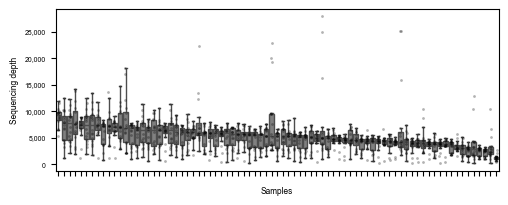

In [12]:
plt.figure(figsize = (5.72,2.1))
sns.boxplot(data = depth_gene_sample, x = "CLEAN_SAMPLE_ID", y = "MEAN_GENE_DEPTH",
            order = samples_list, showfliers = False,
            color = 'gray'
            )
sns.stripplot(data = depth_gene_sample, x = "CLEAN_SAMPLE_ID", y = "MEAN_GENE_DEPTH",
            order = samples_list, # showfliers = False,
            color = 'black',
              alpha = 0.3, size = 2
            )

plt.xticks(ticks=plt.xticks()[0], labels=[''] * len(plt.xticks()[0]))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# sns.despine()
# plt.title("Depth per sample")
# plt.yticks(list(range(0,40001, 5000)), [x if i % 2 == 0 else '' for i, x in enumerate(list(range(0,40001, 5000))) ] )
plt.ylabel("Sequencing depth")
plt.xlabel("Samples")
plt.savefig(f"plot/ExtendedFig1a.pdf", bbox_inches='tight', dpi = 300)
plt.show()

In [13]:
genes_list.remove("TERTpromoter")
genes_list.append("pTERT")

In [14]:
genes_list

['ARID1A',
 'CDKN1A',
 'CREBBP',
 'EP300',
 'FGFR3',
 'FOXQ1',
 'KDM6A',
 'KMT2C',
 'KMT2D',
 'NOTCH2',
 'PIK3CA',
 'RB1',
 'RBM10',
 'STAG2',
 'TP53',
 'pTERT']

In [15]:
depth_gene_sample.loc[depth_gene_sample["GENE"] == 'TERTpromoter','GENE'] = 'pTERT'

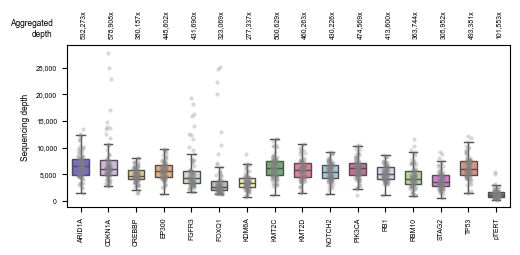

In [16]:
plt.figure(figsize = (5.72,2.1))
sns.boxplot(data = depth_gene_sample, x = "GENE", y = "MEAN_GENE_DEPTH",
            order = genes_list, showfliers = False,
            hue = 'GENE', hue_order = genes_list, palette = gene2color,
            width = 0.6
            )
sns.stripplot(data = depth_gene_sample, x = "GENE", y = "MEAN_GENE_DEPTH",
                order = genes_list, # showfliers = False,
                color = 'grey',
                # hue = 'GENE', hue_order = genes_list, palette = gene2color,
                alpha = 0.3, size = 3
            )
# Calculate sums and annotate
gene_sums = depth_gene_sample.groupby("GENE")["MEAN_GENE_DEPTH"].sum()

for i, gene in enumerate(genes_list):
    sum_value = gene_sums.get(gene, 0)  # Get the sum for the gene
    plt.text(
        i,  # X-coordinate: the index of the gene
        depth_gene_sample["MEAN_GENE_DEPTH"].max() * 1.1,  # Y-coordinate: above the plot
        f"{sum_value:,.0f}x",  # Annotation text
        ha="left",
        va="bottom",
        fontsize=plots_general_config["annots_fontsize"],
        color="black",
        rotation = 90
    )

    
plt.text(
        -1,  # X-coordinate: the index of the gene
        depth_gene_sample["MEAN_GENE_DEPTH"].max() * 1.1,  # Y-coordinate: above the plot
        f"Aggregated\ndepth",  # Annotation text
        ha="right",
        va="bottom",
        fontsize=plots_general_config["xylabel_fontsize"],
        color="black"
    )

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 90)
plt.ylabel("Sequencing depth")
plt.xlabel("")
plt.savefig(f"plot/ExtendedFig1b.pdf", bbox_inches='tight', dpi = 300)
plt.show()

In [17]:
depth_gene_sample.groupby("GENE")["MEAN_GENE_DEPTH"].mean().describe()

count      16.000000
mean     5152.676281
std      1467.170029
min      1285.475506
25%      4475.633476
50%      5455.164372
75%      6066.735147
max      7327.943226
Name: MEAN_GENE_DEPTH, dtype: float64

# Coverage comparison between genes

In [18]:
genes_list = sorted(gene_order_main)

In [19]:
plot_pars = {"fsize"                     : (12,9),
              "hspace"                    : 0.1,                    # General space between all tracks
              "track_title_x_coord"       : 0.83,                   # x-coordinate (respect to protein len) for track txt title
              "score_txt_x_coord"         : 1.13,                   # as track title but for track score txt
              "track_title_fontsize"      : plots_general_config["xylabel_fontsize"],
              "ylabel_fontsize"           : plots_general_config["xylabel_fontsize"],
              "xlabel_fontsize"           : plots_general_config["xylabel_fontsize"],
              "ylabel_pad"                : 20,
              "ticksize"                  : plots_general_config["xyticks_fontsize"],
              "legend_fontsize"           : plots_general_config["legend_fontsize"],
              "legend_frameon"            : False,
              "y_labels_coord"            : [-0.17, 0.5],
              "cnsq_bbox_to_anchor"       : [1.1123, 0.9],
              "o3d_bbox_to_anchor"        : [1.27, 1.35],
              "depth_bbox_to_anchor"      : [1.086, -2.2, 1.4, 5.05],
              "depth_0_bbox_to_anchor"    : [1, -2.2, 0.35, 4.31],
              "legend_depth_fontsize"     : 10.5,
              "sse_bbox_to_anchor"        : [1.2645, 1],
              "domain_y_bbox_to_anchor"   : -3,
              "domain_x_bbox_to_anchor"   : {"ARID1A" : 1.25,
                                            "KDM6A"  : 1.245,
                                            "KMT2D"  : 1.255,
                                            "EP300"  : 1.267,
                                            "CREBBP" : 1.267,
                                            "NOTCH2" : 1.241,
                                            "KMT2C"  : 1.255
                                            },
             "sse_lw"                    : {"KMT2D"  : 1,
                                             "EP300"  : 1,
                                             "ARID1A" : 1,
                                             "CREBBP" : 1,
                                             "NOTCH2" : 1,
                                             "KMT2C"  : 1,
                                             "STAG2"  : 1,
                                             "RB1"    : 1,
                                             "RBM10"  : 1,
                                             "KDM6A"  : 1,
                                             "TP53"   : 2.2,
                                             "FGFR3"  : 1,
                                             "CDKN1A" : 4,
                                             "FOXQ1"  : 2.2,
                                             "PIK3CA" : 1,
                                             "TERT"   : 1,
                                             },
             "covered_region_y_shift"    : {"KMT2D"  : (-0.5,0),
                                             "EP300"  : (0.1,0),
                                             "ARID1A" : (0.2,-0.095),
                                             "CREBBP" : (-0.65,0),
                                             "NOTCH2" : (0,0.03),
                                             "KMT2C"  : (0,0),
                                             "STAG2"  : (-0.1,0.1),
                                             "RB1"    : (0.04,0.03),
                                             "RBM10"  : (0,0),
                                             "KDM6A"  : (-0.3,0.18),
                                             "TP53"   : (0,0),
                                             "FGFR3"  : (0,0),
                                             "CDKN1A" : (-0.4,0),
                                             "FOXQ1"  : (0.15,0),
                                             "PIK3CA" : (0,0),
                                             "TERT"   : (0,0)
                                            },
                                             
             "dpi"                       : 300,
             "colors"                    : {"nonsense"    : "#FB8E6F",  
                                             "synonymous"  : "#ACECBD", 
                                             "missense"    : "#FBD180", 
                                             "o3d_score"   : "#6DBDCC",   
                                             "o3d_cluster" : "#DAF0F8", # "skyblue",  
                                             "indel"       : "#ECC4F7", 
                                             "splicing"    : "#A1C5DF", 
                                             "vlines"      : "lightgray",
                                             "plddt_pacc"  : "#f7f3ff"
                                           },
             "sse_colors"                : {'Coil'   : "#d1d1d1", 
                                             'Helix'  : "#DDDD90", 
                                             'Ladder' : "#8ADEE6"
                                           }
            }

### Normal tissue data

In [20]:
def get_normal_maf(path_maf, only_protein_affecting_pos=True):
    
    maf_df = pd.read_table(path_maf)
    maf_df["CLEAN_SAMPLE_ID"] = maf_df["SAMPLE_ID"].apply(lambda x: "_".join(x.split("_")[1:3]))
    maf_df_f = maf_df.loc[(~maf_df["FILTER.not_covered"])].reset_index(drop = True)
    
    # Final filter
    maf_df_f = maf_df_f[(maf_df_f["TYPE"].isin(["SNV", "INSERTION", "DELETION"])) &
                        (maf_df_f["canonical_SYMBOL"].isin(genes_list))
                       ].reset_index(drop = True)
    
    if only_protein_affecting_pos:
        maf_df_f = maf_df_f[maf_df_f["canonical_Protein_position"] != '-' ]
    
    maf_df_f.loc[(maf_df_f["TYPE"].isin(["INSERTION", "DELETION"])), "canonical_Consequence_broader"] = "indel"
    maf_df_f.canonical_Consequence_broader = maf_df_f.canonical_Consequence_broader.replace("splice_region_variant", "splicing")
    maf_df_f.canonical_Consequence_broader = maf_df_f.canonical_Consequence_broader.replace("essential_splice", "splicing")
    
    # Parse
    cols = ["canonical_SYMBOL", "canonical_Feature", "canonical_Protein_position", "canonical_Consequence_broader", "CHROM", "POS", "DEPTH", "ALT_DEPTH"]
    maf_df_f = maf_df_f[cols].rename(columns={"canonical_SYMBOL" : "Gene", 
                                              "canonical_Feature" : "Ens_transcript_ID",
                                              "canonical_Protein_position" : "Pos",
                                              "canonical_Consequence_broader" : "Consequence",
                                              "CHROM" : "CHR",
                                              "POS" : "DNA_POS"})
    
    maf_df_f.Pos = maf_df_f.Pos.apply(lambda x: 
                                      int(x) if len(x.split("-")) == 1 else 
                                      np.nan if (x.split("-")[0] == "?" or x.split("-")[0] == "") 
                                      else int(x.split("-")[0]))
    if only_protein_affecting_pos:
        maf_df_f = maf_df_f.dropna(subset="Pos").reset_index(drop=True)
        maf_df_f.Pos= maf_df_f.Pos.astype(int)
    
    return maf_df_f

In [21]:
# Count each mutation only ones if it appears in multiple reads 
normal_maf_df = get_normal_maf(f"{deepcsa_run_dir}/clean_somatic/all_samples.somatic.mutations.tsv")
# display(normal_maf_df)
normal_df = normal_maf_df.groupby(['Gene', 'Consequence', 'Pos']).size().reset_index(name='Count')
normal_df

/tmp/ipykernel_3219241/563925136.py:3: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  maf_df = pd.read_table(path_maf)


,Gene,Consequence,Pos,Count
0,ARID1A,indel,380,3
1,ARID1A,indel,381,1
2,ARID1A,indel,384,3
3,ARID1A,indel,387,1
4,ARID1A,indel,388,2
...,...,...,...,...
21193,TP53,synonymous,369,1
21194,TP53,synonymous,371,1
21195,TP53,synonymous,376,1
21196,TP53,synonymous,377,1


#### Use real coordinates from gene transcripts

In [22]:
import requests, sys, time

# Get exons coord
# ---------------

def get_cds_len_with_utr(transcript_id):
    
    server = "https://rest.ensembl.org"
    ext = f"/lookup/id/{transcript_id}?expand=1"

    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})

    while not r.ok:
        print("Retrying lookup..")
        time.sleep(5)
        r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})

    return r.json()


def get_cds_coord(transcript_id):
    
    # The len I need is actually without UTR but it works anyway
    len_cds_with_utr = get_cds_len_with_utr(transcript_id)["length"]

    server = "https://rest.ensembl.org"
    ext = f"/map/cds/{transcript_id}/1..{len_cds_with_utr}?"

    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
    
    while not r.ok:
        print("Retrying DCS map..")
        time.sleep(5)
        r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})

    return r.json()["mappings"]


def parse_cds_coord(exon):
    
    strand = exon["strand"]
    chrom = exon["seq_region_name"]
    if strand == 1:
        start = exon["start"]
        end = exon["end"]
    else:
        start = exon["end"]
        end = exon["start"]
    
    return [chrom, start, end, strand]


# Get Exon coord to protein pos
# -----------------------------

def get_dna_exon_pos(exon_range, strand):

    if strand == -1:
         return np.arange(exon_range[1], exon_range[0] + 1)[::-1]
    else:
        return np.arange(exon_range[0], exon_range[1] + 1)
    

def get_exon_ix(i, exon_range, strand):
    
    len_exon = len(get_dna_exon_pos(exon_range, strand))
    
    return np.repeat(i, len_exon)


def get_dna_map_to_protein(coord_df):
    
    strand = coord_df.Strand.unique()[0]

    exons_range = coord_df[["Start", "End"]].values
    exons = np.concatenate([get_dna_exon_pos(exon, strand) for exon in exons_range])
    exons_ix = np.concatenate([get_exon_ix(i, exon, strand) for i, exon in enumerate(exons_range)])
    
    prot_pos = np.arange(len(exons)) // 3 + 1  
    
    df = pd.DataFrame({"GENE" : coord_df.Gene.unique()[0],
                       "CHR" : f'chr{coord_df.Chr.unique()[0]}', 
                       "DNA_POS" : exons, 
                       "PROT_POS" : np.arange(len(exons)) // 3 + 1,
                       "REVERSE_STRAND" : strand,
                       "EXON" : exons_ix})
    
    return df


def get_prot_coverage(dna_prot_df, gene, filter_masked_depth=True):
    
    gene_dna_prot_df = dna_prot_df[dna_prot_df["GENE"] == gene]
    gene_dna_prot_df = gene_dna_prot_df.dropna(subset=["PROT_POS"])[["PROT_POS", "COVERED", "DEPTH"]].reset_index(drop=True)
    gene_dna_prot_df = gene_dna_prot_df.groupby("PROT_POS").sum().reset_index()
    gene_dna_prot_df.COVERED = (gene_dna_prot_df.COVERED > 0).astype(int)
    
    return gene_dna_prot_df

Load data

In [23]:
# To generate DNA sites
dna_sites = pd.read_table(f"../../data/consensus.exons_splice_sites.unique.tsv")
depth_df = pd.read_table(f"{deepcsa_run_dir}/annotatedepths/all_samples_indv.depths.tsv.gz")

In [24]:
dna_sites = dna_sites.merge(depth_df[["CHROM", "POS", "CONTEXT"]], on = ["CHROM", "POS"], how = 'left')
dna_sites = dna_sites.rename(columns={"POS" : "DNA_POS", "CHROM" : "CHR", "CONTEXT" : "CONTEXT"})

In [25]:
depth_df["DEPTH"] = depth_df.drop(columns=["CHROM", "POS", "CONTEXT"]).mean(1)
depth_df = depth_df[["CHROM", "POS", "DEPTH"]].rename(columns = {"CHROM" : "CHR", "POS" : "DNA_POS"})
depth_df

,CHR,DNA_POS,DEPTH
0,chr1,2529741,31.113924
1,chr1,2529742,32.911392
2,chr1,2529743,34.215190
3,chr1,2529744,35.278481
4,chr1,2529745,37.177215
...,...,...,...
293361,chrY,13479834,31.544304
293362,chrY,13479835,31.215190
293363,chrY,13479836,30.468354
293364,chrY,13479837,30.215190


Get exons coordinates

In [26]:
# Init df for coordinates
coord_df = normal_maf_df[["Gene", "Ens_transcript_ID"]].drop_duplicates().reset_index(drop=True)

# Get coord
coord_df_lst = []
for gene, transcript in coord_df.values:
    print(gene)

    coord_lst = []
    for i, exon in enumerate(get_cds_coord(transcript)):
        coord_lst.append((parse_cds_coord(exon) + [i]))
    
    gene_coord_df = pd.DataFrame(coord_lst, columns = ["Chr", "Start", "End", "Strand", "Exon"])
    gene_coord_df["Gene"] = gene
    gene_coord_df["Ens_transcript_ID"] = transcript
    coord_df_lst.append(gene_coord_df)
    
coord_df = pd.concat(coord_df_lst)
coord_df

ARID1A
NOTCH2
KMT2D
RB1
CREBBP
TP53
EP300
PIK3CA
FGFR3
TERT
FOXQ1
CDKN1A
KMT2C
KDM6A
RBM10
STAG2


,Chr,Start,End,Strand,Exon,Gene,Ens_transcript_ID
0,1,26696404,26697540,1,0,ARID1A,ENST00000324856
1,1,26729651,26729863,1,1,ARID1A,ENST00000324856
2,1,26731152,26731604,1,2,ARID1A,ENST00000324856
3,1,26732676,26732792,1,3,ARID1A,ENST00000324856
4,1,26760856,26761096,1,4,ARID1A,ENST00000324856
...,...,...,...,...,...,...,...
28,X,124090575,124090764,1,28,STAG2,ENST00000371145
29,X,124090854,124090964,1,29,STAG2,ENST00000371145
30,X,124094018,124094144,1,30,STAG2,ENST00000371145
31,X,124095372,124095449,1,31,STAG2,ENST00000371145


Get a DNA to protein mapping and coverage info & DNA to GENE annotation

In [27]:
# Map DNA to protein pos, get exons index to protein pos, etc
dna_prot_df_lst = []
for gene in genes_list:
    print(gene)
    gene_coord_df = coord_df[coord_df["Gene"] == gene]
    dna_prot_df_lst.append(get_dna_map_to_protein(gene_coord_df))
dna_prot_df = pd.concat(dna_prot_df_lst)

# Merge CDS position with availble sites (not masked) and depth info
# and any other site that was included in the panel (splicing sites out of the CDS)
dna_prot_df = dna_sites.merge(dna_prot_df, on=["GENE", "CHR", "DNA_POS"], how="outer")
dna_prot_df["COVERED"] = dna_prot_df["CONTEXT"].notnull().astype(int)
dna_prot_df = dna_prot_df.merge(depth_df, how="left", on=["CHR", "DNA_POS"])
dna_prot_df.loc[dna_prot_df["COVERED"] == 0, "DEPTH"] = 0
dna_prot_df

ARID1A
CDKN1A
CREBBP
EP300
FGFR3
FOXQ1
KDM6A
KMT2C
KMT2D
NOTCH2
PIK3CA
RB1
RBM10
STAG2
TERT
TP53


,CHR,DNA_POS,GENE,CONTEXT,PROT_POS,REVERSE_STRAND,EXON,COVERED,DEPTH
0,chr1,26696404,ARID1A,NaN,1.0,1.0,0.0,0,0.000000
1,chr1,26696405,ARID1A,NaN,1.0,1.0,0.0,0,0.000000
2,chr1,26696406,ARID1A,NaN,1.0,1.0,0.0,0,0.000000
3,chr1,26696407,ARID1A,NaN,2.0,1.0,0.0,0,0.000000
4,chr1,26696408,ARID1A,NaN,2.0,1.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...
95941,chr19,6739789,TRIP10,CTT,NaN,NaN,NaN,1,458.126582
95942,chr19,6739790,TRIP10,ACT,NaN,NaN,NaN,1,454.101266
95943,chr19,6739791,TRIP10,GTC,NaN,NaN,NaN,1,449.683544
95944,chr19,6739792,TRIP10,TCC,NaN,NaN,NaN,1,447.215190


## Per sample exons coverage 
* Exons avarage non-masked sites depth

In [28]:
dna_prot_df = dna_prot_df.rename(columns={"CHR" : "Chr",
                                          "DNA_POS" : "DNA_pos",
                                          "GENE" : "Gene",
                                          "PROT_POS" : "Protein_pos"})

exon_depth_df = []
for gene in genes_list:
    print(gene)
    gene_dna_prot_df = dna_prot_df[dna_prot_df["Gene"] == gene].dropna(
        subset="EXON").sort_values("Protein_pos").reset_index(drop=True).drop(columns=["CONTEXT", "REVERSE_STRAND", "DNA_pos", "Chr"])
    
    gene_dna_prot_df = gene_dna_prot_df.drop(columns=["Protein_pos"])
    gene_dna_prot_df2 = gene_dna_prot_df.groupby("EXON").apply(
        lambda x: np.nan if sum(x.COVERED) == 0 else sum(x.DEPTH) / sum(x.COVERED)).reset_index().rename(columns = {0 : "DEPTH"})
    gene_dna_prot_df2["GENE"] = gene
    gene_dna_prot_df2["COVERED"] = gene_dna_prot_df.groupby("EXON").apply(lambda x: sum(x.COVERED)).values
    exon_depth_df.append(gene_dna_prot_df2)
exon_depth_df = pd.concat(exon_depth_df)
exon_depth_df

ARID1A
CDKN1A
CREBBP
EP300
FGFR3
FOXQ1
KDM6A
KMT2C
KMT2D
NOTCH2
PIK3CA
RB1
RBM10
STAG2
TERT
TP53


/tmp/ipykernel_3219241/473927246.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gene_dna_prot_df2 = gene_dna_prot_df.groupby("EXON").apply(
/tmp/ipykernel_3219241/473927246.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gene_dna_prot_df2["COVERED"] = gene_dna_prot_df.groupby("EXON").apply(lambda x: sum(x.COVERED)).values
/tmp/ipykernel_3219241/473927246.py:13: DeprecationWarning: DataFrameGroupB

,EXON,DEPTH,GENE,COVERED
0,0.0,NaN,ARID1A,0
1,1.0,7094.763297,ARID1A,213
2,2.0,6577.803839,ARID1A,453
3,3.0,6382.344261,ARID1A,117
4,4.0,6939.400494,ARID1A,241
...,...,...,...,...
5,5.0,4735.132336,TP53,110
6,6.0,7179.533309,TP53,137
7,7.0,5850.478276,TP53,74
8,8.0,6707.617177,TP53,107


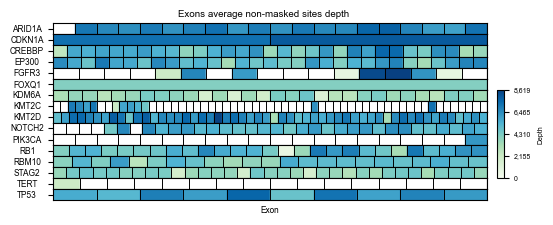

In [29]:
# Not shared x-axis
# -------------

genes = genes_list# exon_depth_df.GENE.unique()
h_ratios = np.repeat(1/len(genes), len(genes))

fig, axes = plt.subplots(len(h_ratios), 1, 
                         figsize=(5.6, 2.3), 
                         sharex=False, 
                         gridspec_kw={'hspace': 0, 
                                      'height_ratios': h_ratios})

# Colormap
# norm = mcolors.Normalize(vmin=exon_depth_df["DEPTH"].min(), vmax=exon_depth_df["DEPTH"].max())
norm = mcolors.Normalize(vmin=0, vmax=exon_depth_df["DEPTH"].max())
cmap = plt.get_cmap("GnBu")


# Do it for every gene
for ax, gene in enumerate(genes):
    gene_exon_df = exon_depth_df[exon_depth_df["GENE"] == gene]
    gene_colors = cmap(norm(gene_exon_df["DEPTH"].values))

    for i, exon in enumerate(gene_exon_df.EXON.values):
        if gene_exon_df.COVERED[i] == 0:
            axes[ax].fill_between(
                [exon, exon+1],
                -0.2, 1.2,
                color = 'white',
                # color="#D1D1D1",
                # color=cmap(norm(0)),
                label=" ")
            
        else:
            axes[ax].fill_between(
                [exon, exon+1], 
                -0.2, 1.2, color=gene_colors[i])
            
        axes[ax].vlines(exon, ymin=-0.2, ymax=1.2, lw=0.7, zorder=1, color="black")
        

    axes[ax].set_ylabel(gene, rotation=0, va='center')
    axes[ax].yaxis.set_label_coords(-0.06, 0.5)

    axes[ax].set_yticks([0.5])  
    axes[ax].vlines(exon+1, ymin=-0.2, ymax=1.2, lw=0.8, zorder=1, color="black")
    axes[ax].set_ylim(-0.2, 1.2)
    axes[ax].set_xlim(0, gene_exon_df.EXON.max()+1)
    axes[ax].set_xticks([])  
    axes[ax].set_yticklabels([''])

    
# Color bar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
inset_ax = inset_axes(axes[ax], width="10%", height="10%", loc='center left', 
                      bbox_to_anchor=[1.022, -34, 0.18, 80],
                      bbox_transform=axes[ax].transAxes,
                      borderpad=0)
cbar = plt.colorbar(sm, cax=inset_ax)  
cbar.set_label('Depth', fontsize=plot_pars["legend_fontsize"]) 

cbar.ax.tick_params(labelsize=plot_pars["ticksize"])   

tick_values = np.linspace(norm.vmin, norm.vmax, 5)  
cbar.set_ticks(tick_values)
cbar.set_ticklabels([f"{val:,.0f}" for val in tick_values]) 
axes[ax].set_xlabel("Exon")


fig.suptitle("Exons average non-masked sites depth", y=0.94)
plt.savefig(f"plot/ExtendedFig1c.pdf", bbox_inches='tight', dpi = 300)
plt.show()

In [31]:
depth_per_samplee = pd.read_table(f"{deepcsa_run_dir}/depthssummary/all_samples.exons_cons.avgdepth_per_sample.tsv")

In [32]:
depth_per_samplee.describe()

,avg_depth_sample
count,79.000000
mean,5229.481076
std,1549.303528
min,1236.358000
25%,4097.405000
50%,5164.296000
75%,6226.204500
max,9303.157000


In [33]:
depth_per_samplee.sum()

SAMPLE_ID           P19_0001_BDO_01P19_0001_BTR_01P19_0002_BDO_01P...
avg_depth_sample                                           413129.005
dtype: object